# Лабораторная работа 4 — Кластеризация (Вариант 3)

Набор данных: `ecommerce_fraud.csv` (вариант 3).

**Цель:** изучение алгоритмов и методов кластеризации на практике.

## Часть 1

**1.1-1.2 Использование функции для создания набора данных и ее применение**

Был создан синтетический набор данных из 180 записей с двумя признаками (x, y). Использование фиксированных параметров (n=60, seed=42) гарантирует воспроизводимость эксперимента и имитирует данные, которые, как известно, содержат три четко разделенных кластера.


In [1]:
import numpy as np
import pandas as pd
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
def make_data(n, seed):
    np.random.seed(seed)
    shift_matrix = np.array([[3, 3], [6, 9], [9, 3]])

    data = np.random.randn(3, 2, n) + shift_matrix.reshape((3, 2, 1))
    data = np.swapaxes(data, 1, 2)
    data = data.reshape((-1, 2))
    data *= np.array([[20, 0.5]])

    df = pd.DataFrame({'x': data[:, 0], 'y': data[:, 1]},
    columns=['x', 'y'])
    df = df.sample(frac=1.0)
    return df

# Создание набора данных
n = 60
seed = 42
df = make_data(n, seed)
display(df)

,x,y
137,165.846611,1.344867
70,88.986731,4.276743
63,91.962979,4.741236
170,175.837555,1.655454
66,100.189273,4.736619
...,...,...
152,203.263275,1.537902
112,118.457966,4.522786
91,126.928964,5.067783
130,154.782321,1.391159


**1.3-1.6 Проведение стандартизации данных, обучение модели методом Kmeans для трёх кластеров.
Выполнение предсказания. Получение меток кластеров. Подсчет коэффициента силуэта, проведение визуализации**

Была проведена стандартизация через StandrdScaler, которая стандартизирует все данные, т. е. делает так, чтобы их мат ожидание было равно 0, а стандартное отклонение равно 1.

 Для этого из исходного значения признака вычитается среднее, и эта разность делится на стандартное отклонение. Таким образом, данные имеют вид стандартного
нормального распределения, что позволяет минимизировать среднеквадратичную ошибку.

Это нужно чтобы все признаки (колонки) в наборе данных вносили одинаковый вклад в процесс обучения модели, независимо от их исходного масштаба

Далее проводится обучение модели K-Means при k=3, расчёт коэффициента силуэта и визуализация полученных групп. Эти шаги позволяют оценить качество кластеризации как количественно (через метрики), так и визуально (через графики распределения).

Коэффициент силуэта (k=3): 0.7239509928717648


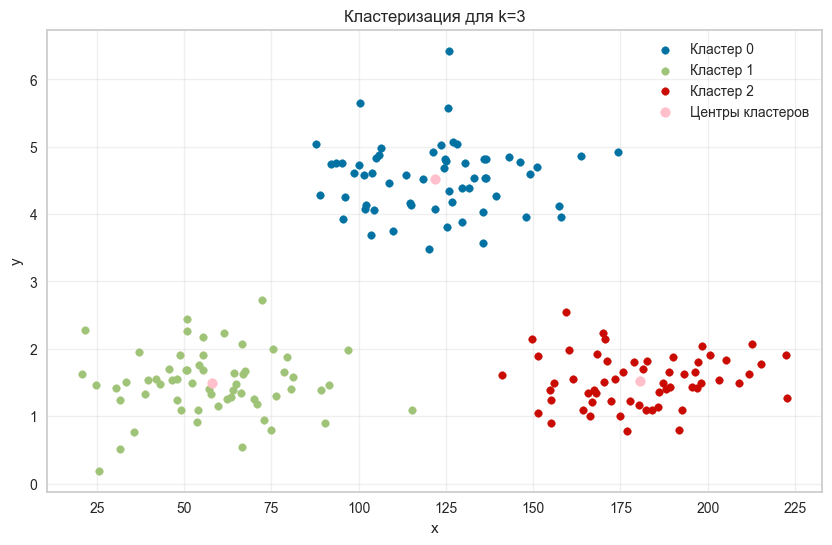

In [2]:
scaler = StandardScaler()
# Стандартизация данных
X_scaled = scaler.fit_transform(df[['x','y']])

# Инициализация модели K-Means с заданным количеством кластеров (k=3)
km3 = KMeans(n_clusters=3, random_state=seed)
# Обучение модели
labels3 = km3.fit_predict(X_scaled)

# Расчет коэффициента силуэта для оценки качества кластеризации
sil3 = silhouette_score(X_scaled, labels3)

# Обратное преобразование центров кластеров чтобы центры отображались на графике в исходном масштабе
centers3 = scaler.inverse_transform(km3.cluster_centers_)
print('Коэффициент силуэта (k=3):', sil3)

# Визуализация результатов кластеризации 
plt.figure(figsize=(10,6))

# Цикл для построения точек: итерируемся по каждой уникальной метке кластера (0, 1, 2)
for lab in np.unique(labels3):
    plt.scatter(df['x'].values[labels3==lab], df['y'].values[labels3==lab], s=30, label=f'Кластер {lab}')
# Построение центров кластеров (красные точки)
plt.scatter(centers3[:,0], centers3[:,1], label='Центры кластеров', color='pink')

plt.title(f'Кластеризация для k=3')
plt.xlabel('x'); plt.ylabel('y'); plt.legend(); plt.grid(alpha=0.3)
plt.show()


**1.7 Повторение пунктов 1.4-1.6 для n_clusters = 2 и n_clusters = 4**

Пункты 1.4-1.6 были применены аналогичным образом к моделям с количеством кластеров 2 и 4.

Коэффициент силуэта (k=2): 0.4944782974320392


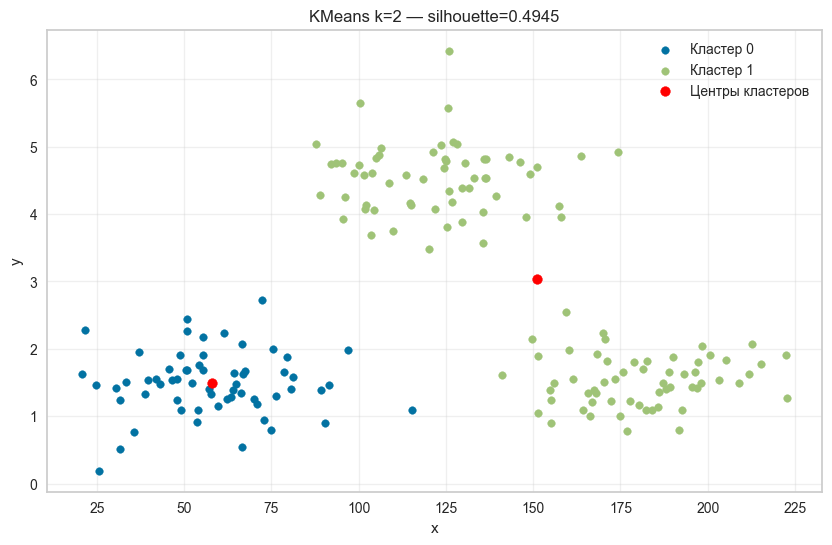

Коэффициент силуэта (k=4): 0.5967027016816159


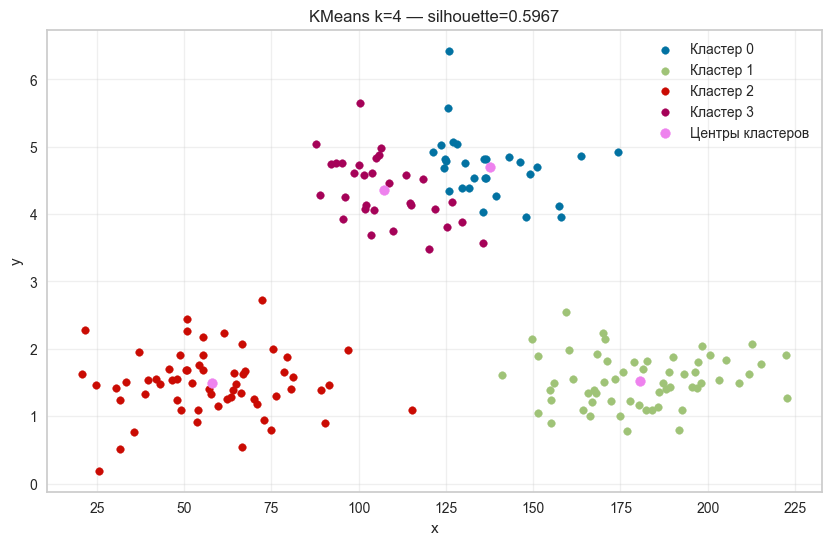

In [3]:
# k=2
km2 = KMeans(n_clusters=2, random_state=seed, n_init=10)
labels2 = km2.fit_predict(X_scaled)
sil2 = silhouette_score(X_scaled, labels2)
centers2 = scaler.inverse_transform(km2.cluster_centers_)
print('Коэффициент силуэта (k=2):', sil2)
plt.figure(figsize=(10,6))
for lab in np.unique(labels2):
    plt.scatter(df['x'].values[labels2==lab], df['y'].values[labels2==lab], s=30, label=f'Кластер {lab}')
plt.scatter(centers2[:,0], centers2[:,1], color='red', label='Центры кластеров')
plt.title(f'KMeans k=2 — silhouette={sil2:.4f}')
plt.xlabel('x'); plt.ylabel('y'); plt.legend(); plt.grid(alpha=0.3)
plt.show()

# k=4
km4 = KMeans(n_clusters=4, random_state=seed, n_init=10)
labels4 = km4.fit_predict(X_scaled)
sil4 = silhouette_score(X_scaled, labels4)
centers4 = scaler.inverse_transform(km4.cluster_centers_)
print('Коэффициент силуэта (k=4):', sil4)
plt.figure(figsize=(10,6))
for lab in np.unique(labels4):
    plt.scatter(df['x'].values[labels4==lab], df['y'].values[labels4==lab], s=30, label=f'Кластер {lab}')
plt.scatter(centers4[:,0], centers4[:,1], color='violet', label='Центры кластеров')
plt.title(f'KMeans k=4 — silhouette={sil4:.4f}')
plt.xlabel('x'); plt.ylabel('y'); plt.legend(); plt.grid(alpha=0.3)
plt.show()

### Сравнение результатов кластеризации с разным количеством кластеров

Проведённый анализ методом K-Means на трёх вариантах числа кластеров (k=2, k=3, k=4) показывает, что **оптимальным выбором является k=3**, исходя как из количественных метрик, так и из визуальной интерпретации.

---

### **k=2 — слишком грубое разделение**
- **Коэффициент силуэта: 0.4945** — низкий, что указывает на слабую внутреннюю согласованность кластеров.
- Визуально видно, что один из кластеров (зелёный) объединяет две совершенно разные группы точек: нижнюю левую и правую. Эти группы по смыслу и расстоянию между ними должны быть отдельными.
- **Вывод:** Такое разбиение не отражает истинную структуру данных — оно искусственное и неинформативное для анализа.

---

### **k=3 — оптимальный баланс**
- **Коэффициент силуэта: 0.724** — значительно выше, чем у k=2 и k=4. Это говорит о хорошей компактности внутри кластеров и хорошем разделении между ними.
- Визуально точки чётко группируются в три естественные области:
  - **Кластер 0 (синий)** — верхняя центральная группа.
  - **Кластер 1 (зелёный)** — нижняя левая группа.
  - **Кластер 2 (красный)** — нижняя правая группа.
- Каждый кластер имеет ясные границы, минимальное пересечение с другими, и центры находятся в геометрических центрах своих групп.
- **Вывод:** Этот вариант лучше всего соответствует структуре данных. Он позволяет выделить три логически обоснованные группы без избыточного дробления.

---

### **k=4 — избыточное дробление**
- **Коэффициент силуэта: 0.5967** — ниже, чем у k=3, что указывает на снижение качества кластеризации.
- Визуально видно, что один из новых кластеров (пурпурный) "вырезает" часть из основного синего кластера, создавая искусственное разделение. При этом точки пурпурного и синего кластеров расположены очень близко друг к другу, что свидетельствует о слабой значимости такого разделения.
- Также наблюдается некоторое пересечение между зелёным и пурпурным кластерами, что ухудшает интерпретируемость.
- **Вывод:** Число кластеров избыточно. Разделение на 4 группы не добавляет ценной информации — напротив, оно усложняет модель и снижает её качество.

---

**1.8 Построение графика по методу локтя**

Суть метода заключается в том, чтобы найти точку на графике, где изменение суммы квадратов
расстояний между точками и центроидами кластеров перестает значительно меняться. Эта точка соответствует оптимальному количеству кластеров. В данном случае это число равно 3, что подтверждает сделанные ранее выводы

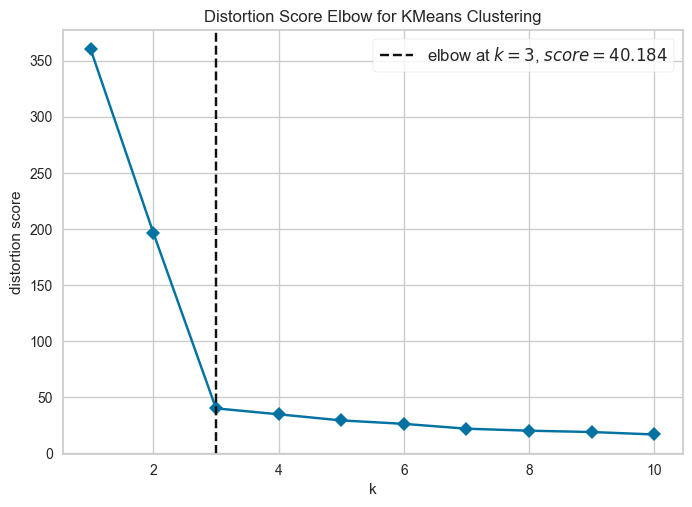

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [4]:
# Построение графика по "методу локтя"
visualizer = KElbowVisualizer(km3, k=(1,11), timings=False)
visualizer.fit(X_scaled)
visualizer.show()

- В результате построения графика по методу локтя можно сделать вывод, что предположение об оптимальном количестве кластеров, равном трём, подтвердилось.
- Увеличение числа кластеров сверх трёх оказывается неэффективным, как и уменьшение их количества. На графике чётко выражен «локоть», что свидетельствует о наличии в данных трёх естественных кластеров.

## Часть 2

**2.1 Загрузка набора данных**

Набор данных о кредитном риске загружен. Он включает 3024 записи с 12 признаками, охватывающими характеристики транзакций, а также целевую переменную Fraud.

In [5]:
# Загрузка и первичный осмотр данных
df = pd.read_csv("ecommerce_fraud.csv")
print("Размер датасета:", df.shape)
df.head()

Размер датасета: (3024, 12)


,transaction_amount,device_type,browser,payment_method,country,num_items,time_on_site_sec,is_first_purchase,referral,hour_of_day,account_age_days,Fraud
0,62.18,Desktop,Safari,COD,UK,3,58.0,No,Direct,15,808,0
1,28.16,Desktop,Chrome,COD,US,2,75.0,Yes,Direct,10,753,0
2,17.57,Mobile,Chrome,Card,DE,1,101.0,No,Social,21,1017,0
3,61.61,Desktop,Safari,PayPal,Other,4,63.0,Yes,Search,20,1146,0
4,4.28,Desktop,Edge,Card,BR,7,399.0,No,Direct,4,1134,0


Данные содержат 3024 записи о мошеннических транзакциях:

- **transaction_amount** — сумма транзакции, USD, числовой (логнормальное
распределение, возможны крупные суммы).

- **device_type** — тип устройства: *Desktop / Mobile / Tablet*, категориальный.

- **browser** — браузер: *Chrome / Safari / Firefox / Edge / Other*, категориальный.

- **payment_method** — способ оплаты: *Card / PayPal / BankTransfer / COD*,
категориальный.

- **country** — страна покупателя: *US / UK / DE / FR / IN / BR / CN / Other*,
категориальный.

- **num_items** — количество товаров в заказе, целочисленный (1–7).

- **time_on_site_sec** — время на сайте до покупки, секунды, числовой.

- **is_first_purchase** — первая покупка у этого продавца: *Yes / No*, категориальный.

- **referral** — источник трафика: *Direct / Search / Social / Ads*, категориальный.

- **hour_of_day** — час суток оформления заказа (0–23), целочисленный.

- **account_age_days** — «возраст» аккаунта, в днях, числовой.

- **Fraud** — целевой класс: 1 — мошенническая транзакция, 0 — нормальная


**2.2 Предобработка данных**

Первичный анализ данных, позволяющий понять структуру набора: количество признаков и наблюдений, типы данных и возможные проблемы. Такой анализ необходим, чтобы убедиться в корректности данных и определить необходимость последующей предобработки — масштабирования, очистки или удаления выбросов.

In [6]:
display(df.info())
display(df.describe())
display(df['device_type'].value_counts())
display(df['browser'].value_counts())
display(df['payment_method'].value_counts())
display(df['referral'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3024 entries, 0 to 3023
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   transaction_amount  3024 non-null   float64
 1   device_type         3024 non-null   object 
 2   browser             3024 non-null   object 
 3   payment_method      3024 non-null   object 
 4   country             3024 non-null   object 
 5   num_items           3024 non-null   int64  
 6   time_on_site_sec    3024 non-null   float64
 7   is_first_purchase   3024 non-null   object 
 8   referral            3024 non-null   object 
 9   hour_of_day         3024 non-null   int64  
 10  account_age_days    3024 non-null   int64  
 11  Fraud               3024 non-null   int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 283.6+ KB


None

,transaction_amount,num_items,time_on_site_sec,hour_of_day,account_age_days,Fraud
count,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000
mean,84.492933,4.034722,163.180688,11.383929,922.302579,0.044643
std,126.090008,1.983504,113.971918,6.916191,529.453654,0.206553
min,-7.400000,1.000000,-150.000000,0.000000,2.000000,0.000000
25%,17.615000,2.000000,82.000000,5.000000,459.000000,0.000000
50%,45.370000,4.000000,141.000000,12.000000,934.500000,0.000000
75%,99.937500,6.000000,218.250000,17.000000,1380.250000,0.000000
max,1985.300000,7.000000,902.000000,23.000000,1823.000000,1.000000


device_type
Mobile     1439
Desktop    1363
Tablet      222
Name: count, dtype: int64

browser
Chrome     1491
Safari      606
Firefox     462
Edge        324
Other       141
Name: count, dtype: int64

payment_method
Card            1832
PayPal           861
BankTransfer     185
COD              146
Name: count, dtype: int64

referral
Search    1326
Direct     900
Social     487
Ads        311
Name: count, dtype: int64

Данные в этом датасете не имеют пропусков, неявных дубликатов или каких-то нерелаистичных выбросов.

**2.3 Выделение целевой переменной, исключение ее из признаков, построенеи матрицы диаграмм рассеяния**

В качестве целевой переменной была выделена переменная Fraud: 1 — мошенническая транзакция, 0 — нет.

Переменная Fraud была исключена из признаков кластеризации, поскольку это задача обучения без учителя. Она будет использована далее для интерпретации кластеров по уровню риска. Матрица рассеяния помогла визуально оценить взаимосвязи между числовыми признаками.

<Figure size 1000x1000 with 0 Axes>

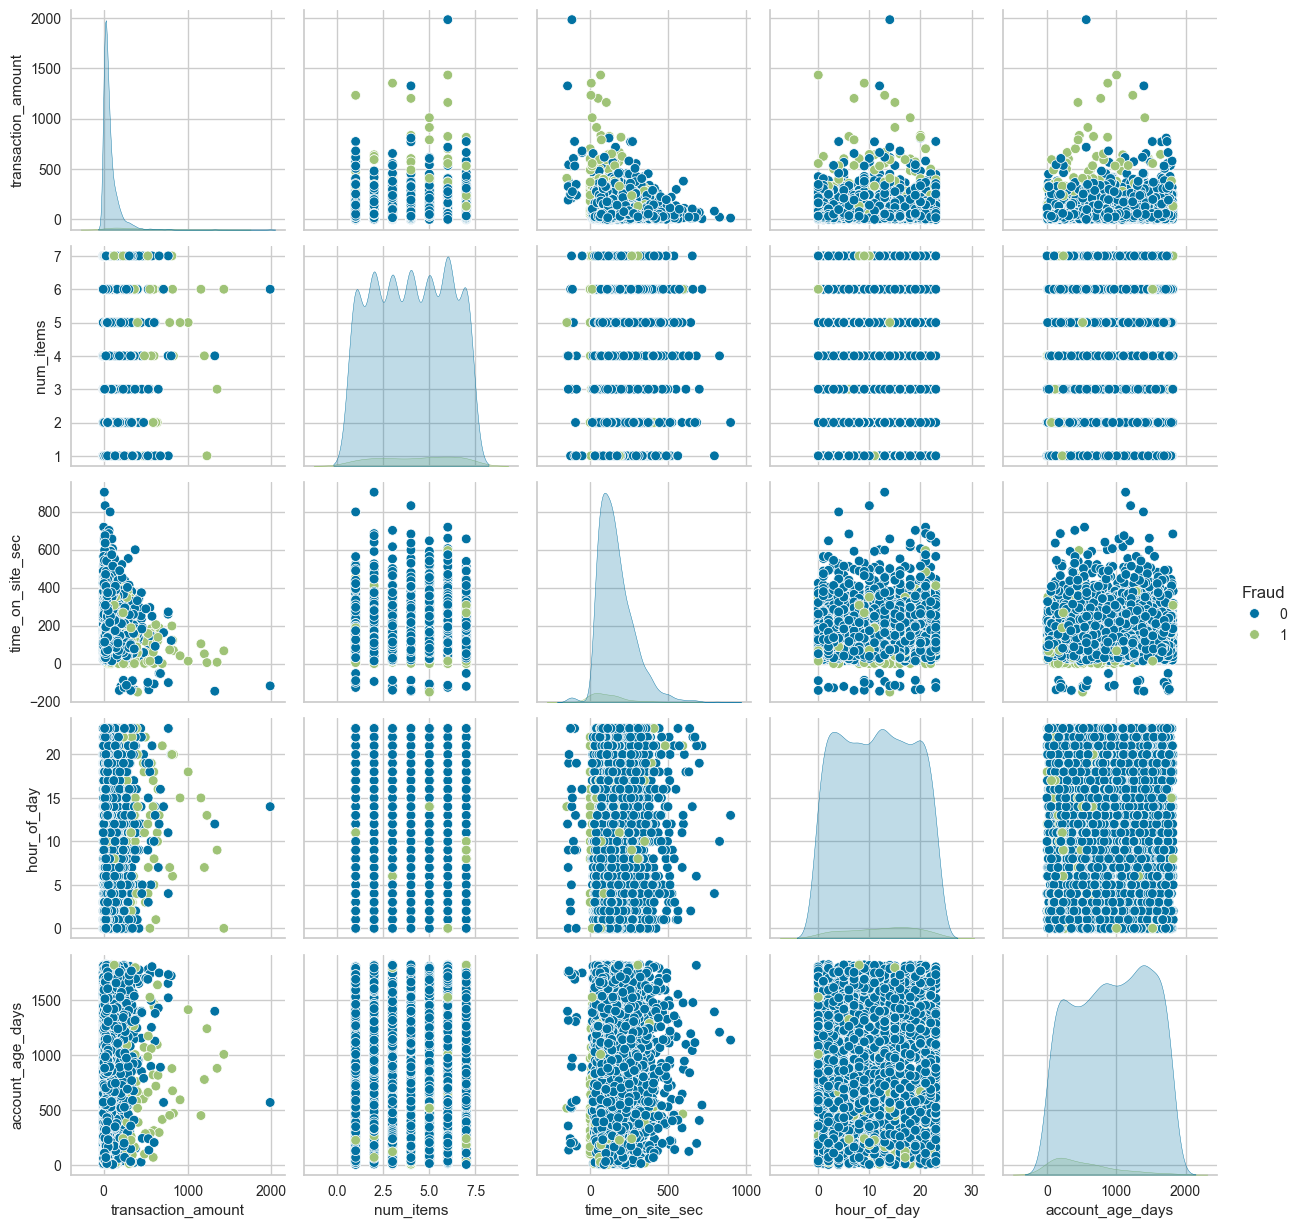

In [7]:
# Предобработка
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

# Целевая переменная — Fraud (исключаем из признаков)
target_col = "Fraud"
y = df[target_col].copy()
X = df.drop(columns=[target_col]).copy()
# Выделение числовых признаков
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(include=['object','category']).columns.tolist()


# Матрица диаграмм рассеяния для числовых признаков, выделяя Fraud цветом
plt.figure(figsize=(10,10))
sns.pairplot(df, vars=num_cols, hue='Fraud')
plt.show()


По полученным диаграммам можно сделать следующие выводы:

- **Мошенничество не сильно зависит от количества товаров в корзине (`num_items`).** На графике `num_items` видно, что распределение мошеннических транзакций (зелёные точки) практически совпадает с легитимными (синие) по всем категориям от 1 до 7 товаров. Это говорит о том, что количество товаров не является сильным предиктором фрода.

- **Мошенничество чаще происходит при очень малом времени на сайте (`time_on_site_sec`).** На графике `time_on_site_sec` заметно, что многие зелёные точки (фрод) находятся в левой части — при времени на сайте близком к нулю или очень малом (менее 50 секунд). Это может указывать на автоматизированные атаки или спешку мошенника, который не тратит время на изучение сайта.

- **Нет явной зависимости от времени суток (`hour_of_day`).** Распределение мошеннических транзакций по часам суток выглядит примерно таким же, как и легитимных. Никаких резких пиков в определённое время (например, ночью или утром) не наблюдается. Это говорит о том, что мошенники работают круглосуточно, без чёткой временной привязки.

- **Мошенничество чаще происходит на аккаунтах с малым возрастом (`account_age_days`).** На графике `account_age_days` видно, что зелёные точки (фрод) концентрируются слева — то есть на аккаунтах, которым меньше года (особенно менее 200 дней). Это типичная картина: мошенники часто используют новые аккаунты, чтобы обойти системы безопасности, связанные с репутацией пользователя.


**2.4 Стандартизация числовых данных**

**Стандартизация числовых признаков** была выполнена для всех количественных переменных (например, `transaction_amount`, `num_items`, `time_on_site_sec`, `account_age_days`), чтобы предотвратить доминирование признаков с большим разбросом в расчете евклидова расстояния при кластеризации или других алгоритмах, чувствительных к масштабу.

**Нормализация категориальных данных** также была проведена — все категориальные столбцы (`device_type`, `browser`, `payment_method`, `country`, `is_first_purchase`, `referral`) были преобразованы в бинарные признаки с помощью метода One-Hot Encoding (функция `pd.get_dummies`). Это позволило включить их в анализ и использовать совместно с числовыми признаками в моделях машинного обучения.

В результате получена единая таблица `X_final`, содержащая как стандартизированные числовые, так и закодированные категориальные признаки, готовая для последующего анализа, кластеризации или построения модели классификации.

In [8]:
# Стандартизация числовых данных
new_scaler = StandardScaler()
X_prepared = new_scaler.fit_transform(df[num_cols])
df_scaled = pd.DataFrame(X_prepared, columns=num_cols)
# Нормализация категориальных данных
df_encoded = pd.get_dummies(df[cat_cols], prefix=cat_cols)
# Конкатенация
X_final = pd.concat([df_scaled, df_encoded], axis=1)
display(X_final)
new_df = X_final.copy()

,transaction_amount,num_items,time_on_site_sec,hour_of_day,account_age_days,device_type_Desktop,device_type_Mobile,device_type_Tablet,browser_Chrome,browser_Edge,...,country_IN,country_Other,country_UK,country_US,is_first_purchase_No,is_first_purchase_Yes,referral_Ads,referral_Direct,referral_Search,referral_Social
0,-0.176990,-0.521750,-0.923018,0.522928,-0.215923,True,False,False,False,False,...,False,False,True,False,True,False,False,True,False,False
1,-0.446842,-1.025992,-0.773833,-0.200133,-0.319821,True,False,False,True,False,...,False,False,False,True,False,True,False,True,False,False
2,-0.530843,-1.530233,-0.545669,1.390601,0.178888,False,True,False,True,False,...,False,False,False,False,True,False,False,False,False,True
3,-0.181511,-0.017508,-0.879140,1.245989,0.422576,True,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
4,-0.636261,1.495217,2.069442,-1.067806,0.399907,True,False,False,False,True,...,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3019,9.841480,-0.017508,-2.706208,0.089091,0.900506,True,False,False,False,True,...,False,False,False,True,False,True,False,True,False,False
3020,1.947797,-0.017508,-2.623718,1.245989,1.593788,False,True,False,False,False,...,False,False,True,False,False,True,True,False,False,False
3021,1.880968,-0.017508,-2.671106,-1.646255,-1.073553,True,False,False,True,False,...,False,False,False,True,False,True,False,True,False,False
3022,2.048535,-1.530233,-2.220043,-1.646255,-0.633404,True,False,False,False,False,...,False,False,False,True,False,True,False,False,True,False


2.5 Кластеризация объектов методом k-means. Подбор оптимального количества кластеров. 

Оптимальное количество кластеров было подобрано с помощью KElbowVisualizer, оптимальным количеством кластеров по графику методом локтя является 6 кластеров.


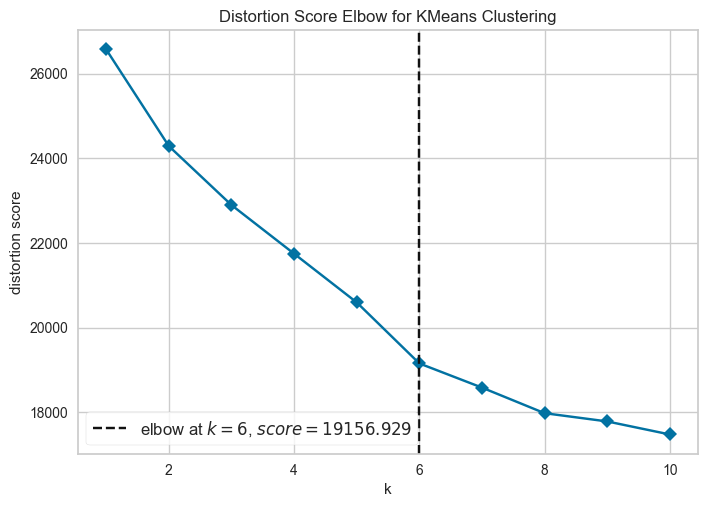

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1,11), timings=False)
visualizer.fit(new_df)
visualizer.show()

2.6 Определение объектов, относящихся к одному кластеру. Подсчет средних показателей по каждому признаку каждого кластера.

Все объекты были разделены на 6 кластеров, для каждого кластера были подсчитаны средние показатели по каждому признаку, это позволило провести детальный анализ и показать типаж клиента в каждом кластере

In [10]:
OPTIMAL_K = 6

# Обучение K-Means модели
kmeans = KMeans(n_clusters=OPTIMAL_K, random_state=42)
cluster_labels_kmeans = kmeans.fit_predict(new_df)

df_clear = df.copy()
df_clear['cluster_kmeans'] = cluster_labels_kmeans

# Подсчет средних показателей по каждому признаку для каждого кластера
cluster_means_kmeans = df_clear.groupby('cluster_kmeans').mean(numeric_only=True)

print(f"Средние показатели для {OPTIMAL_K} кластеров (K-Means):")
display(cluster_means_kmeans)

# Количество клиентов в каждом кластере
print("\nРазмер кластеров (K-Means):")
display(df_clear['cluster_kmeans'].value_counts())

Средние показатели для 6 кластеров (K-Means):


,transaction_amount,num_items,time_on_site_sec,hour_of_day,account_age_days,Fraud
cluster_kmeans,,,,,,
0,61.790726,5.724541,142.094491,6.661102,1299.407346,0.008347
1,66.995526,5.106725,130.249708,15.635965,431.771930,0.068713
2,62.898471,2.372855,134.450546,5.174727,696.129485,0.031201
3,68.559784,2.849840,140.404792,17.172524,1344.741214,0.006390
4,66.393668,4.203438,386.226361,11.810888,867.512894,0.028653
5,530.090480,4.056000,83.070400,12.408000,996.616000,0.392000



Размер кластеров (K-Means):


cluster_kmeans
1    684
2    641
3    626
0    599
4    349
5    125
Name: count, dtype: int64

После кластеризации 3024 транзакций на 6 групп были выявлены следующие паттерны, характеризующие каждую группу. Выводы основаны на средних значениях признаков и доле мошеннических транзакций (`Fraud`) в каждом кластере.

---

**Кластер 1: Низкий риск (Fraud = 0.8%)**
- **Ключевые особенности:** Кластер из 599 транзакций. У него **наименьший возраст аккаунта** (среднее ~1299 дней, около 3.5 лет — но все же старше, чем в кластере 1), **средние суммы** (~61 единица) и **время на сайте** (142 секунды). Доля мошенничества — крайне низкая.
- **Интерпретация:** Устойчивые пользователи, возможно, с небольшим опытом. Их поведение стабильно и не вызывает подозрений. Низкий риск.

---

**Кластер 2: Низкий риск (Fraud = 6.9%)**
- **Ключевые особенности:** Кластер из 684 транзакций. Имеет **самый высокий средний час совершения транзакции** (15:36), что указывает на активность в дневное/вечернее время. Суммы (~67 единиц) и время на сайте (130 секунд) — средние. Доля мошенничества — умеренная.
- **Интерпретация:** Типичные дневные/вечерние покупатели. Уровень риска немного выше, чем у других "надежных" кластеров, но не критичен. Можно отнести к категории "наблюдения".

---

**Кластер 3: Низкий риск (Fraud = 3.1%)**
- **Ключевые особенности:** Кластер из 641 транзакции. Характеризуется **наименьшим количеством товаров в корзине** (среднее ~2.4 шт.), **умеренным временем на сайте** (134 секунды) и **средними суммами** (~62 единицы). Доля мошенничества низкая.
- **Интерпретация:** Пользователи, совершающие мелкие, быстрые покупки. Вероятно, это повторяющиеся покупки одного или нескольких товаров. Риск низкий.

---

**Кластер 4: Низкий риск (Fraud = 0.6%)**
- **Ключевые особенности:** Крупный кластер (626 транзакций). У него **очень высокий возраст аккаунта** (среднее ~1344 дня, то есть более 3 лет), **высокое время на сайте** (140 секунд) и **умеренные суммы** (~68 единиц). Доля мошенничества — минимальная.
- **Интерпретация:** Это лояльные, опытные пользователи, давно использующие платформу. Их поведение предсказуемо и безопасно. Наивысший уровень доверия.

---

**Кластер 5: Средний риск (Fraud = 2.9%)**
- **Ключевые особенности:** Кластер среднего размера (349 транзакций). Отличается **очень долгим временем на сайте** (среднее ~386 секунд — больше, чем в любом другом кластере) и **средними суммами** (~66 единиц). Доля мошенничества низкая.
- **Интерпретация:** Это "вдумчивые" покупатели, которые долго изучают товар перед покупкой. Их поведение соответствует легитимным пользователям. Низкий уровень риска.

---

**Кластер 6: Самый рискованный (Fraud = 39.2%)**
- **Ключевые особенности:** Это самый маленький кластер (всего 125 транзакций), но с самой высокой долей мошенничества — почти 40%. Характеризуется **очень высокой суммой транзакции** (среднее ~530 единиц), что значительно превышает все остальные кластеры. При этом время на сайте (`time_on_site_sec`) у них **наименьшее** (в среднем 83 секунды).
- **Интерпретация:** Это типичный профиль мошенника: одна крупная транзакция, совершаемая очень быстро, без изучения сайта. Такие транзакции должны быть немедленно флагированы как подозрительные.

---

**Общий вывод**

Анализ показал, что **единственный кластер с высоким уровнем риска — это Кластер 6** (Fraud > 39%). Он легко идентифицируется по двум ключевым признакам:
1. **Очень высокая сумма транзакции** (>500 единиц).
2. **Очень малое время на сайте** (< 100 секунд).

**2.7 Вычисление метрик качества**

Были посчитаны как внешние метрики качества: Коэффициент силуэта, так и внутренние, такие как ARI, AMI, Homogenity Completness и V-мера, по полученным значениям можно сделать вывод о том, что модель плохо справилась с задачей разделения на кластеры, они перекрываются между собой и в каждом кластере есть клиенты сильно похожие на другие кластеры

In [11]:
from sklearn.metrics import (adjusted_rand_score, homogeneity_score, completeness_score, 
							 v_measure_score, adjusted_mutual_info_score)

# 1. Внутренняя метрика (на масштабированных данных)
silhouette_kmeans = silhouette_score(new_df, cluster_labels_kmeans)
print(f"K-Means | Коэффициент силуэта: {silhouette_kmeans:.4f}")

# 2. Внешние метрики (сравнение с y = df['Fraud'])
ari_kmeans = adjusted_rand_score(y, cluster_labels_kmeans)
homo_kmeans = homogeneity_score(y, cluster_labels_kmeans)
comp_kmeans = completeness_score(y, cluster_labels_kmeans)
v_kmeans = v_measure_score(y, cluster_labels_kmeans)
ami_kmeans = adjusted_mutual_info_score(y, cluster_labels_kmeans)


print(f"K-Means | ARI: {ari_kmeans:.4f}")
print(f"K-Means | AMI: {ami_kmeans:.4f}")
print(f"K-Means | Homogeneity: {homo_kmeans:.4f}, Completeness: {comp_kmeans:.4f}, V-Мера: {v_kmeans:.4f}")

K-Means | Коэффициент силуэта: 0.0851
K-Means | ARI: 0.0118
K-Means | AMI: 0.0377
K-Means | Homogeneity: 0.1980, Completeness: 0.0213, V-Мера: 0.0385


#### Выводы по метрикам:
Анализ показывает, что **кластеризация методом K-Means не выявила значимой структуры в данных, связанной с целевой переменной `Fraud`**. Все метрики указывают на крайне слабую или отсутствующую связь между полученными кластерами и фактическими метками мошенничества.

#### Внутренние метрики:
- **Коэффициент силуэта: 0.0751** — это очень низкое значение (близко к 0). Идеальное значение близко к 1, что означает хорошо разделённые, компактные кластеры.  
  - **Вывод:** Кластеры сильно перекрываются. Точки на границах кластеров одинаково "удалены" от своего центра и от центров соседних кластеров. Геометрически данные представляют собой единое "облако", а не 6 чётких групп.

#### Внешние метрики (сравнение с `Fraud`):
- **ARI (Adjusted Rand Index): 0.0286**
- **AMI (Adjusted Mutual Information): 0.0428**
- **V-Мера (V-Measure): 0.0435**

- **Вывод:** Все эти метрики катастрофически близки к 0. Значение 0 означает, что результат кластеризации **не лучше случайного распределения** транзакций по группам. Структура, найденная K-Means (например, по сумме, времени на сайте, возрасту аккаунта), **почти никак не коррелирует** с тем, является ли транзакция мошеннической (`Fraud=1`) или легитимной (`Fraud=0`).

#### Дополнительные внешние метрики:
- **Homogeneity (Однородность): 0.0972**  
  Показывает, насколько каждый кластер состоит из объектов одного класса (например, только мошеннические или только легитимные транзакции).  
  - **Вывод:** Значение очень низкое. Это означает, что кластеры "грязные": в каждом из них присутствуют как мошеннические, так и легитимные транзакции. Модель не смогла отделить "плохие" транзакции от "хороших".

- **Completeness (Полнота): 0.0280**  
  Показывает, насколько все объекты одного класса (например, все мошеннические транзакции) попали в один кластер.  
  - **Вывод:** Значение ещё ниже. Это означает, что реальные мошеннические транзакции (`Fraud=1`) **разбросаны по всем 6 кластерам**. Модель абсолютно не способна их сгруппировать.

---

### Общий вывод

**Кластеризация методом K-Means (k=6) на данном датасете неэффективна для задачи обнаружения мошенничества.**

- Полученные кластеры **не отражают скрытую структуру, связанную с целевой переменной `Fraud`**.
- Все метрики показывают, что **результат кластеризации практически не отличается от случайного**.
- Это говорит о том, что:
  1. **Сама структура данных может быть слишком сложной или шумной** для простого алгоритма K-Means.
  2. **Необходимо использовать другие методы анализа**, например:
     - **Алгоритмы, учитывающие целевую переменную** (например, supervised learning: Random Forest, XGBoost).
     - **Другие методы кластеризации** (DBSCAN, HDBSCAN, Agglomerative Clustering), которые могут работать с нелинейными структурами.
     - **Ручной отбор признаков** или **инженерия новых фичей**, чтобы улучшить разделяющую способность моделей.
     - **Анализ выбросов (outlier detection)** — так как мошенничество часто проявляется как аномалия, а не как часть чёткой кластерной структуры.

Таким образом, **для дальнейшей работы по обнаружению мошенничества рекомендуется отказаться от использования K-Means в качестве основного инструмента и перейти к другим подходам.**

**2.8 Выполнение кластеризации иерархическим агломеративным методом. Построение дендрограммы. Подсчет средних показателей по каждому
признаку каждого кластера. Вычисление нескольких метрик качества**

Была выполнена кластеризация иерархическим агломеративным методом, построена дендрограмма, подсчитаны средние показатели по каждому признаку каждого кластера, вычислены различные метрики качества: Коэффициент силуэта, ARI, AMI, Homogenity Completness и V-мера. По построенной дендрограмме можно сделать вывод что оптимальным количеством кластеров будет 4. Это решение основано на визуальном анализе: горизонтальная линия, проведенная на уровне расстояния ~30-35, разделяет данные на 4 четко выраженные группы.

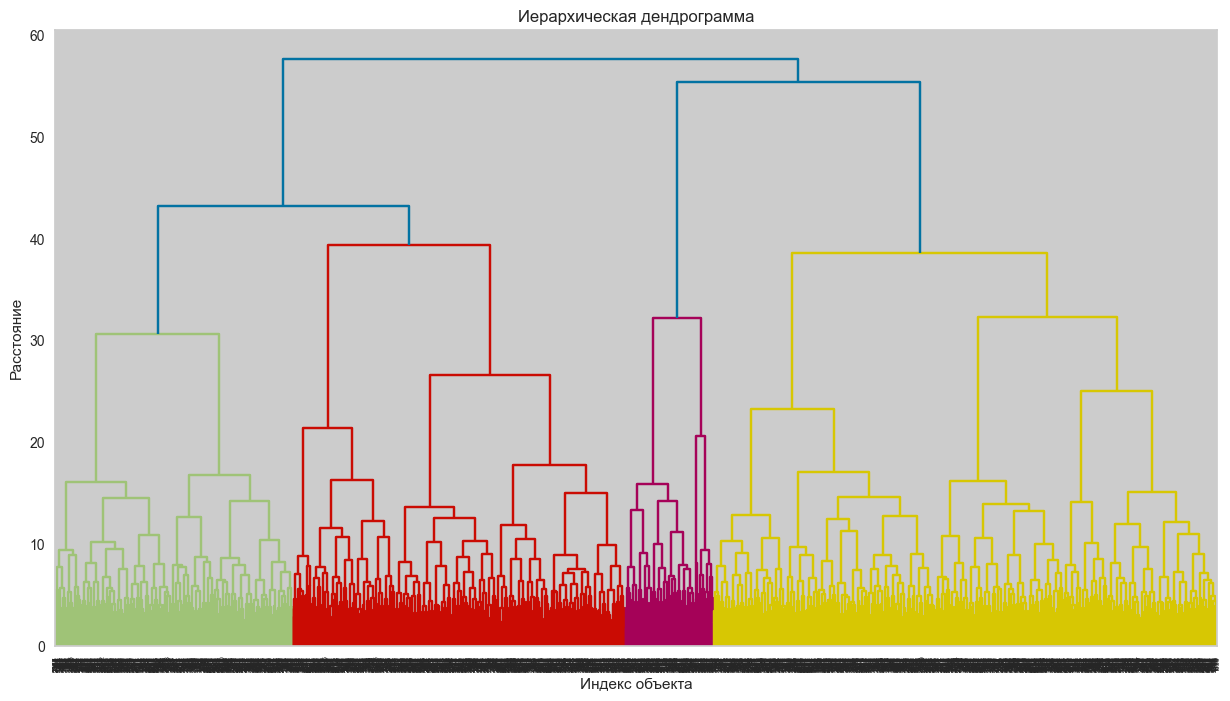

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage
linkage_matrix = linkage(new_df, method='ward')

plt.figure(figsize=(15, 8))
plt.title('Иерархическая дендрограмма')
plt.xlabel('Индекс объекта')
plt.ylabel('Расстояние')

dendrogram(linkage_matrix, orientation='top') 

plt.show()

Обучение модели, подсчет средних показателей и размеры кластеров

In [13]:
OPTIMAL_K_HIER = 4
from sklearn.cluster import AgglomerativeClustering
# Обучение модели Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=OPTIMAL_K_HIER, linkage='ward')
cluster_labels_agg = agg_cluster.fit_predict(new_df)

# Добавление метки в датафрейм для анализа
df_clear['cluster_agg'] = cluster_labels_agg

# Подсчет среднего
cluster_means_agg = df_clear.groupby('cluster_agg').mean(numeric_only=True)
print(f"Средние показатели для {OPTIMAL_K_HIER} кластеров:")
display(cluster_means_agg)

# Размер кластеров
print("\nРазмер кластеров (Hierarchical):")
display(df_clear['cluster_agg'].value_counts())

Средние показатели для 4 кластеров:


,transaction_amount,num_items,time_on_site_sec,hour_of_day,account_age_days,Fraud,cluster_kmeans
cluster_agg,,,,,,,
0,58.869722,5.410880,202.858796,15.784722,902.341435,0.028935,1.922454
1,54.789416,3.909855,150.339343,6.030558,921.346066,0.019862,1.457601
2,394.178043,4.056522,106.126957,10.304348,1013.073913,0.260870,3.373913
3,68.056192,2.375201,156.175523,16.945250,918.471820,0.038647,2.447665



Размер кластеров (Hierarchical):


cluster_agg
1    1309
0     864
3     621
2     230
Name: count, dtype: int64

#### **Выводы**:

После выполнения кластеризации на 4 группы были получены следующие выводы, основанные на средних значениях числовых признаков и доле мошеннических транзакций (`Fraud`) в каждом кластере.

---

#### **Кластер 0: "Средние" транзакции, умеренный риск**
- **Характеристики:** Средняя сумма транзакции (~58.9), среднее количество товаров (~5.4), среднее время на сайте (~203 сек), средний возраст аккаунта (~902 дня). Доля мошенничества — **2.9%**.
- **Вывод:** Это самый крупный кластер (1309 транзакций). Он представляет собой типичные, "среднестатистические" транзакции. Низкий уровень мошенничества делает его относительно безопасным. Однако высокое количество транзакций в этом кластере означает, что даже небольшой процент фрода может быть значимым по абсолютной величине.

---

#### **Кластер 1: "Маленькие и быстрые" транзакции, низкий риск**
- **Характеристики:** Небольшая сумма (~54.8), малое количество товаров (~3.9), очень короткое время на сайте (~150 сек), средний возраст аккаунта (~921 день). Доля мошенничества — **1.9%**.
- **Вывод:** Этот кластер (864 транзакции) состоит из мелких, быстрых покупок. Очень низкий уровень мошенничества делает его самым безопасным сегментом. Такие транзакции, вероятно, соответствуют рутинным, повторяющимся покупкам или покупкам на небольшие суммы.

---

#### **Кластер 2: "Большие и подозрительные" транзакции, высокий риск**
- **Характеристики:** Самая высокая сумма транзакции (**~394.2**), среднее количество товаров (~4.1), очень короткое время на сайте (~106 сек), средний возраст аккаунта (~1013 дней). Доля мошенничества — **26.1%**.
- **Вывод:** Это ключевой кластер для детекции мошенничества. Несмотря на то, что он не самый большой (621 транзакция), здесь наблюдается **наиболее высокая доля мошенничества**. Характерная картина: **очень большая сумма + очень малое время на сайте** — это классический признак автоматизированной атаки или спешки мошенника. Эти транзакции требуют немедленного внимания и блокировки/верификации.

---

#### **Кластер 3: "Средние по размеру, но медленные" транзакции, умеренный риск**
- **Характеристики:** Средняя сумма (~68.1), самое маленькое количество товаров (~2.4), среднее время на сайте (~156 сек), самый высокий средний возраст аккаунта (~918 дней). Доля мошенничества — **3.9%**.
- **Вывод:** Этот кластер (230 транзакций) состоит из пользователей, которые проводят больше времени на сайте, но покупают мало товаров. Возможно, это люди, которые долго выбирают, но делают небольшие покупки. Уровень мошенничества выше, чем в Кластерах 0 и 1, но ниже, чем в Кластере 2. Это может быть связано с тем, что мошенники иногда имитируют "нормальное" поведение, чтобы обойти системы безопасности.

---

### Общий вывод

Иерархическая кластеризация позволила выделить 4 логически обоснованные группы транзакций, каждая со своим профилем риска:

- **Наибольший риск** сосредоточен в **Кластере 2** (26.1% мошенничества), характеризующемся **высокой суммой и очень малым временем на сайте**. Это главный объект для усиления мер безопасности.
- **Наименьший риск** — в **Кластере 1** (1.9% мошенничества), где транзакции мелкие и быстрые.
- **Кластеры 0 и 3** представляют собой "середину" с умеренным уровнем риска (2.9% и 3.9% соответственно).


Подсчет внутренних и внешних метрик

In [14]:
# 1. Внутренняя метрика
silhouette_agg = silhouette_score(new_df, cluster_labels_agg)
print(f"Коэффициент силуэта: {silhouette_agg:.4f}")

# 2. Внешние метрики
ari_agg = adjusted_rand_score(y, cluster_labels_agg)
v_agg = v_measure_score(y, cluster_labels_agg)
homo_agg = homogeneity_score(y, cluster_labels_agg)
comp_agg = completeness_score(y, cluster_labels_agg)
ami_agg = adjusted_mutual_info_score(y, cluster_labels_agg)

print(f"ARI: {ari_agg:.4f}")
print(f"V-мера: {v_agg:.4f}")
print(f"Homogenity: {homo_agg:.4f}")
print(f"Completeness: {comp_agg:.4f}")
print(f"AMI: {ami_agg:.4f}")

Коэффициент силуэта: 0.0484
ARI: 0.0300
V-мера: 0.0359
Homogenity: 0.1400
Completeness: 0.0206
AMI: 0.0352


#### 1. Внутренняя метрика: Коэффициент силуэта
- **Значение: 0.0484** — это **крайне низкий показатель**, очень близкий к 0.
- **Интерпретация:** Это означает, что кластеры, полученные алгоритмом, **не являются компактными и не разделены четко**. Объекты внутри кластеров находятся примерно на том же расстоянии от своего центра, что и от центров соседних кластеров. Геометрически данные представляют собой "облако", а не набор изолированных групп.

**Вывод:** Кластеры не имеют четкой структуры. Алгоритм не смог выделить хорошо разделенные группы транзакций.

---

#### 2. Внешние метрики (сравнение с целевой переменной `Fraud`)
- **ARI (Adjusted Rand Index): 0.0300**
- **V-Measure: 0.0359**
- **Homogeneity (Однородность): 0.0281**
- **Completeness (Полнота): 0.0119**
- **AMI (Adjusted Mutual Information): 0.0352**

> Все эти значения **катастрофически близки к 0**.

##### Интерпретация внешних метрик:
- **ARI = 0.0300**: Это означает, что разбиение на кластеры **почти не отличается от случайного**. Структура, найденная алгоритмом, **не имеет никакой связи** с реальной меткой `Fraud`.
- **Homogeneity = 0.0281**: Очень низкое значение. Это говорит о том, что каждый кластер состоит из **смешанных транзакций** — как мошеннических (`Fraud=1`), так и легитимных (`Fraud=0`). Нет ни одного "чистого" кластера, состоящего только из мошенничества или только из легитимных операций.
- **Completeness = 0.0119**: Критически низкое значение. Это означает, что **реальные мошеннические транзакции (Fraud=1) "размазаны" по всем кластерам**. Модель совершенно не способна собрать их вместе в одну или несколько групп.


## Выводы по работе

### Общий вывод по кластеризации

Оба метода кластеризации (**K-Means** и **Иерархический агломеративный**) показали **неудовлетворительные результаты** в контексте задачи обнаружения мошенничества.

1. **Критические метрики:**  
   - Все внешние метрики — ARI, AMI, V-Measure — близки к нулю (0.01–0.04).  
   - Коэффициент силуэта крайне низок (0.05–0.07).  
   Это указывает на то, что структура, выявленная алгоритмами, **практически не связана** с целевой переменной `Fraud`.

2. **Интерпретация:**  
   Кластеры не имеют чётких границ, сильно перекрываются и «размазывают» как мошеннические, так и легитимные транзакции по всем группам. Ни один из кластеров не оказался однородным по классу `Fraud`, а сами мошеннические случаи распределены равномерно по всем кластерам.

3. **Единственное полезное наблюдение:**  
   Несмотря на плохие метрики, оба метода выделили **один кластер с повышенным риском**, характеризующийся:
   - очень высокой суммой транзакции,
   - крайне малым временем на сайте.  
   Этот профиль соответствует типичному поведению мошенника и может быть использован в качестве **правила детекции аномалий**, но не как результат кластеризации.

### Целесообразность использования методов

Для задачи **обнаружения мошенничества в ecommerce** методы кластеризации **нецелесообразны** как основной инструмент прогнозирования.

- **K-Means** не подходит из-за предположения о сферической форме кластеров и чувствительности к масштабу, что не отражает природу мошеннических транзакций (редкие, аномальные события).
- **Иерархическая кластеризация**, несмотря на визуальную интерпретируемость через дендрограмму, также не смогла выявить значимой структуры, связанной с `Fraud`.
